In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

np.random.seed(42)
torch.manual_seed(42)

In [4]:
X, y = make_classification(
    n_samples=1000,     # Number of samples
    n_features=2,    # Number of features  
    n_classes=2,     # Number of classes
    n_redundant=0,      # No redundant features
    random_state=42
)

print(f"Dataset shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Unique labels: {np.unique(y)}")

Dataset shape: (1000, 2)
Labels shape: (1000,)
Unique labels: [0 1]


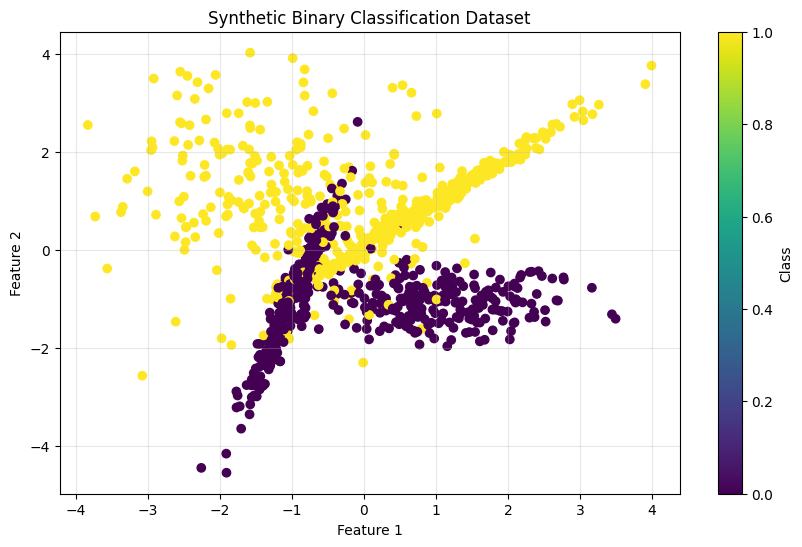

Class distribution: [498 502]
Feature 1 range: [-3.84, 3.99]
Feature 2 range: [-4.54, 4.02]


In [5]:
plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Binary Classification Dataset')
plt.colorbar(label='Class')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Class distribution: {np.bincount(y)}")  # Hint: Use np.bincount(y)
print(f"Feature 1 range: [{X[:,0].min():.2f}, {X[:,0].max():.2f}]")  # Hint: Use X[:, 0].min() and max()
print(f"Feature 2 range: [{X[:,1].min():.2f}, {X[:,1].max():.2f}]")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features
    y,  # Labels  
    test_size=0.3,  # What percentage for testing?
    random_state=42,
    stratify=y    # Should we maintain class balance? Use y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training labels distribution: {np.bincount}")  # Use np.bincount
print(f"Testing labels distribution: {np.bincount}")   # Use np.bincount

Training set shape: (700, 2)
Testing set shape: (300, 2)
Training labels distribution: <built-in function bincount>
Testing labels distribution: <built-in function bincount>


In [11]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize a simple 2-layer neural network
        
        Args:
            input_size: Number of input features
            hidden_size: Number of neurons in hidden layer
            output_size: Number of output neurons
        """
        # TODO: Initialize weights and biases
        # Hint: Use np.random.randn() for random initialization
        # Scale by 0.01 to keep values small
        
        # Weights from input to hidden layer
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01  # Shape: (input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))                 # Shape: (1, hidden_size)
        
        # Weights from hidden to output layer  
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01  # Shape: (hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))                 # Shape: (1, output_size)
        
    def sigmoid(self, x):
        """
        TODO: Implement sigmoid activation function
        Formula: 1 / (1 + exp(-x))
        
        Hint: Use np.exp() and be careful of numerical overflow
        You might want to clip x to prevent overflow
        """
        # Clip x to prevent overflow
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))  # Implement the formula above
    
    def sigmoid_derivative(self, x):
        """
        TODO: Implement derivative of sigmoid
        Formula: sigmoid(x) * (1 - sigmoid(x))
        """
        sig = self.sigmoid(x)
        return sig * (1 - sig)
    
    def forward(self, X):
        """
        TODO: Implement forward propagation
        
        Steps:
        1. Calculate z1 = X @ W1 + b1
        2. Calculate a1 = sigmoid(z1)
        3. Calculate z2 = a1 @ W2 + b2  
        4. Calculate a2 = sigmoid(z2)
        
        Store intermediate values for backpropagation
        """
        # Input to hidden layer
        self.z1 = X @ self.W1 + self.b1  # Linear combination
        self.a1 = self.sigmoid(self.z1)  # Activation
        
        # Hidden to output layer
        self.z2 = self.a1 @ self.W2 + self.b2    # Linear combination
        self.a2 = self.sigmoid(self.z2)  # Final output
        
        return self.a2
    
    def compute_loss(self, y_true, y_pred):
        """
        TODO: Implement binary cross-entropy loss
        Formula: -[y*log(y_pred) + (1-y)*log(1-y_pred)]
        
        Hint: Add small epsilon to prevent log(0)
        """
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        
        loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))  # Implement the formula above
        return np.mean(loss)

# Test the network initialization
network = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1)
print(f"W1 shape: {network.W1.shape}")
print(f"W2 shape: {network.W2.shape}")
print("Network initialized successfully!")

W1 shape: (2, 4)
W2 shape: (4, 1)
Network initialized successfully!


In [12]:
test_input = X_train[:5]  # Take first 5 samples
test_labels = y_train[:5].reshape(-1, 1)  # Reshape for consistency

# TODO: Run forward propagation
predictions = network.forward(test_input)

print(f"Input shape: {test_input.shape}")
print(f"Predictions shape: {predictions.shape}")
print(f"Predictions: {predictions.flatten()}")
print(f"True labels: {test_labels.flatten()}")

# TODO: Calculate loss
loss = network.compute_loss(test_labels,predictions)
print(f"Initial loss: {loss:.4f}")

Input shape: (5, 2)
Predictions shape: (5, 1)
Predictions: [0.49813373 0.49813138 0.49814994 0.49818675 0.49819371]
True labels: [1 1 1 1 0]
Initial loss: 0.6954


In [13]:
def backward(self, X, y_true, y_pred):
    """
    TODO: Implement backpropagation
    
    WHAT IS BACKPROPAGATION?
    Backpropagation is like "learning from mistakes" - it calculates how much each weight
    contributed to the error, then adjusts weights to reduce that error.
    
    This is challenging! You need to:
    1. Calculate gradients for output layer
    2. Calculate gradients for hidden layer
    3. Update weights and biases
    
    Research the math behind backpropagation!
    """
    m = X.shape[0]  # Number of samples
    
    dz2 = y_pred - y_true  
    dW2 = self.a1.T @ dz2 / m  # Gradient for W2 
    db2 = np.sum(dz2,axis=0,keepdims=True)  # TODO: Calculate gradient for b2
    
    da1 = dz2 @ self.W2.T                          # Backprop error to hidden layer
    dz1 = da1 * self.sigmoid_derivative(self.z1)   # Elementwise multiply with sigmoid' output
    dW1 = X.T @ dz1 / m                            # Gradient for W1
    db1 = np.sum(dz1, axis=0, keepdims=True) / m   # Gradient for b1
    
    return dW1, db1, dW2, db2

def update_weights(self, dW1, db1, dW2, db2, learning_rate):
    self.W1 -= learning_rate * dW1
    self.b1 -= learning_rate * db1
    self.W2 -= learning_rate * dW2
    self.b2 -= learning_rate * db2

# Add methods to the class
SimpleNeuralNetwork.backward = backward
SimpleNeuralNetwork.update_weights = update_weights

In [14]:
# Prepare data for training
X_train_norm = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)  # Normalize features
X_test_norm = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)    # Use training stats
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# Training parameters
epochs = 1000      # TODO: How many epochs? Try 1000
learning_rate = 0.1  # TODO: What learning rate? Try 0.1

# Initialize network
network = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1)

# Storage for plotting
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Forward propagation on training data
    train_pred = network.forward(X_train_norm)
    
    # Calculate training loss
    train_loss = network.compute_loss(y_train_reshaped, train_pred)
    
    # Backpropagation (compute gradients)
    dW1, db1, dW2, db2 = network.backward(X_train_norm, y_train_reshaped, train_pred)
    
    # Update weights and biases
    network.update_weights(dW1, db1, dW2, db2, learning_rate)
    
    # Forward propagation on test data (for monitoring)
    test_pred = network.forward(X_test_norm)
    test_loss = network.compute_loss(y_test_reshaped, test_pred)
    
    # Store losses for plotting
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}")

print("Training completed!")


Epoch 0: Train Loss = 0.6932, Test Loss = 0.6991
Epoch 100: Train Loss = 2.9383, Test Loss = 14.4504
Epoch 200: Train Loss = 2.9374, Test Loss = 14.4505
Epoch 300: Train Loss = 2.9348, Test Loss = 14.4507
Epoch 400: Train Loss = 2.9258, Test Loss = 14.4486
Epoch 500: Train Loss = 2.8927, Test Loss = 14.4284
Epoch 600: Train Loss = 2.8069, Test Loss = 14.3257
Epoch 700: Train Loss = 2.7156, Test Loss = 13.9809
Epoch 800: Train Loss = 2.7818, Test Loss = 13.1087
Epoch 900: Train Loss = 3.0814, Test Loss = 11.5219
Training completed!


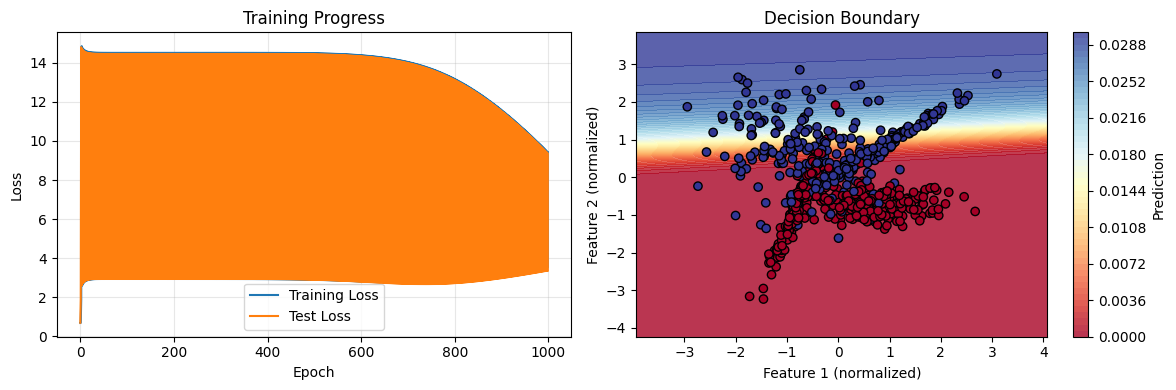

In [15]:
plt.figure(figsize=(12, 4))

# Loss curves
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Progress')
plt.legend()
plt.grid(True, alpha=0.3)

# Decision boundary visualization
plt.subplot(1, 2, 2)

# Mesh grid for boundary
h = 0.02
x_min, x_max = X_train_norm[:, 0].min() - 1, X_train_norm[:, 0].max() + 1
y_min, y_max = X_train_norm[:, 1].min() - 1, X_train_norm[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predictions for each mesh point
mesh_points = np.column_stack([xx.ravel(), yy.ravel()])
Z = network.forward(mesh_points).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
plt.colorbar(label='Prediction')

# Plot training points
scatter = plt.scatter(X_train_norm[:, 0], X_train_norm[:, 1], c=y_train, cmap='RdYlBu', edgecolors='black')
plt.xlabel('Feature 1 (normalized)')
plt.ylabel('Feature 2 (normalized)')
plt.title('Decision Boundary')

plt.tight_layout()
plt.show()


In [16]:
def calculate_accuracy(y_true, y_pred):
    """
    Calculate classification accuracy.
    """
    binary_pred = (y_pred > 0.5).astype(int)         # Threshold probabilities at 0.5
    accuracy = (binary_pred == y_true).mean()        # Compare prediction with true labels
    return accuracy
# Get final predictions for training and test data
train_pred_final = network.forward(X_train_norm)
test_pred_final = network.forward(X_test_norm)

# Calculate accuracies
train_accuracy = calculate_accuracy(y_train_reshaped, train_pred_final)
test_accuracy = calculate_accuracy(y_test_reshaped, test_pred_final)

print(f"\nFinal Results:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Test Loss: {test_losses[-1]:.4f}")



Final Results:
Training Accuracy: 0.4986
Test Accuracy: 0.4967
Final Training Loss: 9.4265
Final Test Loss: 3.3657


In [17]:
# Let's explore some popular open-source libraries
libraries_to_explore = {
    'PyTorch': 'Deep learning framework by Meta',
    'TensorFlow': 'Deep learning framework by Google', 
    'Hugging Face Transformers': 'Pre-trained language models',
    'scikit-learn': 'Traditional machine learning',
    'OpenCV': 'Computer vision library'
}

print("Popular Open-Source AI Libraries:")
for lib, description in libraries_to_explore.items():
    print(f"• {lib}: {description}")

print("\n🔍 TODO: Research Task")
print("For each library above:")
print("1. Visit their GitHub repository")
print("2. Check how many stars and contributors they have")
print("3. Look at their documentation")
print("4. Find one interesting example or use case")

Popular Open-Source AI Libraries:
• PyTorch: Deep learning framework by Meta
• TensorFlow: Deep learning framework by Google
• Hugging Face Transformers: Pre-trained language models
• scikit-learn: Traditional machine learning
• OpenCV: Computer vision library

🔍 TODO: Research Task
For each library above:
1. Visit their GitHub repository
2. Check how many stars and contributors they have
3. Look at their documentation
4. Find one interesting example or use case


In [18]:
# Final challenge: Experiment with hyperparameters
print("🎯 FINAL CHALLENGE:")
print("Try modifying these parameters and observe the effects:")
print("1. learning_rate: Try 0.01, 0.1, 1.0")
print("2. hidden_size: Try 2, 8, 16 neurons")
print("3. epochs: Try 500, 2000")
print("4. Add more hidden layers")

print("\n📝 Questions to consider:")
print("• Which combination gives the best test accuracy?")
print("• How does training time change with more neurons?")
print("• Can you achieve >95% accuracy?")


🎯 FINAL CHALLENGE:
Try modifying these parameters and observe the effects:
1. learning_rate: Try 0.01, 0.1, 1.0
2. hidden_size: Try 2, 8, 16 neurons
3. epochs: Try 500, 2000
4. Add more hidden layers

📝 Questions to consider:
• Which combination gives the best test accuracy?
• How does training time change with more neurons?
• Can you achieve >95% accuracy?
